In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_VGG

Using TensorFlow backend.


Data type changed to float32, label type changed to categorical
rescale = 1/255.


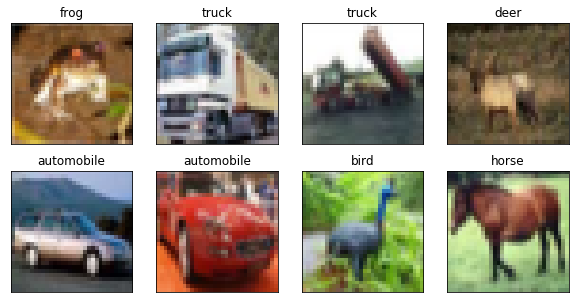

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_VGG.datasets.cifar10.load_data()


show_images(X_train_origin, Y_train_origin, 8)

(X_train, Y_train), (X_test, Y_test) = cifar_VGG_data_load(cifar10_VGG.datasets.cifar10)

In [3]:
cifar_model = cifar10_VGG.CifarVGG(img_shape = X_train[0].shape, class_num = 10,
                                      do_batch_norm = True, do_drop = True)

모델 펼처보기

In [4]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [5]:
history_train = cifar_model.train(X_train, Y_train, 2, 16, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 120s 3ms/step - loss: 2.0412 - acc: 0.2409 - val_loss: 2.2641 - val_acc: 0.2119

Epoch 00001: val_loss improved from inf to 2.26407, saving model to ./save_model/model/vgg_2019-05-04_18h09m44s/01-2.2641-0.2409.hd5
Epoch 2/2
40000/40000 [==============================] - 117s 3ms/step - loss: 1.6859 - acc: 0.3566 - val_loss: 1.6368 - val_acc: 0.3907

Epoch 00002: val_loss improved from 2.26407 to 1.63676, saving model to ./save_model/model/vgg_2019-05-04_18h09m44s/02-1.6368-0.3566.hd5

 Training --- 244.90358543395996 sec---
10000/10000 [==============================] - 3s 330us/step
Test Loss :  1.6457939712524414
Test Accuracy :  0.3856
Test Loss :  1.6457939712524414
Test Accuracy :  38.56 %
predict class :  [5 1 8]
actual class :  [3 8 8]


In [6]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [4 4 4]


In [7]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [4 4 4]


In [8]:
prediction = cifar_model.predict(X_test)

In [9]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[4 4 4 4 4 4 4 4]


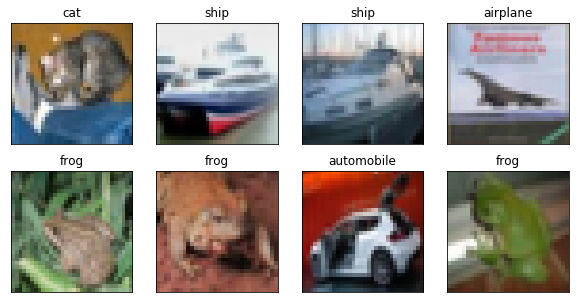

In [10]:
show_images(X_test_origin, Y_test_origin, 8)

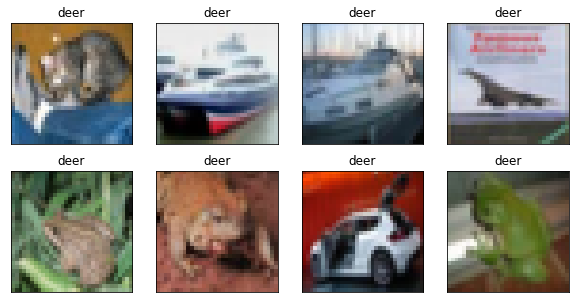

In [11]:
show_images(X_test_origin, prediction, 8)

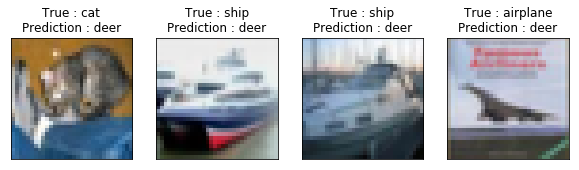

In [12]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [13]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 3s 308us/step
Test Loss :  3.2254178886413576
Test Accuracy :  0.1136


In [14]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[0.01897971 0.00318065 0.27175394 0.07862788 0.28362012 0.07495175
  0.19327469 0.06775331 0.00461471 0.00324324]
 [0.01897971 0.00318065 0.27175394 0.07862788 0.28362012 0.07495175
  0.19327469 0.06775331 0.00461471 0.00324324]
 [0.01897971 0.00318065 0.27175394 0.07862788 0.28362012 0.07495175
  0.19327469 0.06775331 0.00461471 0.00324324]]


In [15]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [4 4 4]


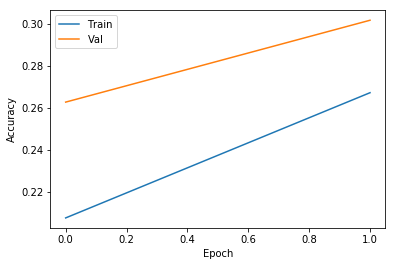

In [16]:
cifar10_VGG.plot_acc(history_train)

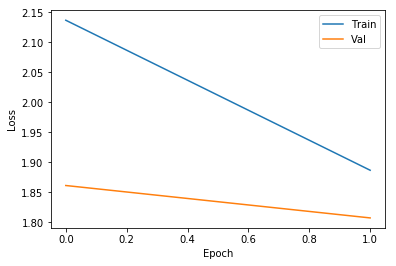

In [17]:
cifar10_VGG.plot_loss(history_train)

In [18]:
history_train.history['acc'][-1]

0.26714

In [19]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[ 131    0   21    0  848    0    0    0    0    0]
 [   2    0    2    0  996    0    0    0    0    0]
 [  22    0    9    0  969    0    0    0    0    0]
 [   2    0    1    0  997    0    0    0    0    0]
 [   2    0    2    0  996    0    0    0    0    0]
 [   1    0    1    0  998    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [  41    0   11    0  948    0    0    0    0    0]
 [   4    0    2    0  994    0    0    0    0    0]]


In [20]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.64      0.13      0.22      1000
           1       0.00      0.00      0.00      1000
           2       0.18      0.01      0.02      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.19      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

   micro avg       0.11      0.11      0.11     10000
   macro avg       0.09      0.11      0.04     10000
weighted avg       0.09      0.11      0.04     10000



/home/masteryang/.conda/envs/tensorflow35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
cifar_model.model.pop()

In [23]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [24]:
cifar_model.model.pop()
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

/home/masteryang/.conda/envs/tensorflow35/lib/python3.5/site-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
